In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,test_size=0.2,shuffle=True)

row,column,layer= xtrain.shape[1:]

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

result = model.fit(xtrain,ytrain,epochs=100,validation_data=(xval,yval))

model.save('/content/Modelcifar10.h5')


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/100
1250/1250 [==============================] - 21s 9ms/step - loss: 2.4076 - accuracy: 0.4328 - val_loss: 1.9703 - val_accuracy: 0.5278
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7153 - accuracy: 0.6064 - val_loss: 1.5416 - val_accuracy: 0.6501
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4831 - accuracy: 0.6604 - val_loss: 1.6055 - val_accuracy: 0.6285
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4022 - accuracy: 0.6873 - val_loss: 1.3171 - val_accuracy: 0.7181
Epoch 5/100
1250/1250 [==============================] - 11s 8ms/step - loss: 1.3794 - accuracy: 0.7034 - val_loss: 1.4068 - val_accuracy: 0.6990
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3406 - accuracy: 0.7174 - val_loss: 1.1882 - val_accuracy: 0.7671
Epoch 7/100
1250/1250 [==============================] - 

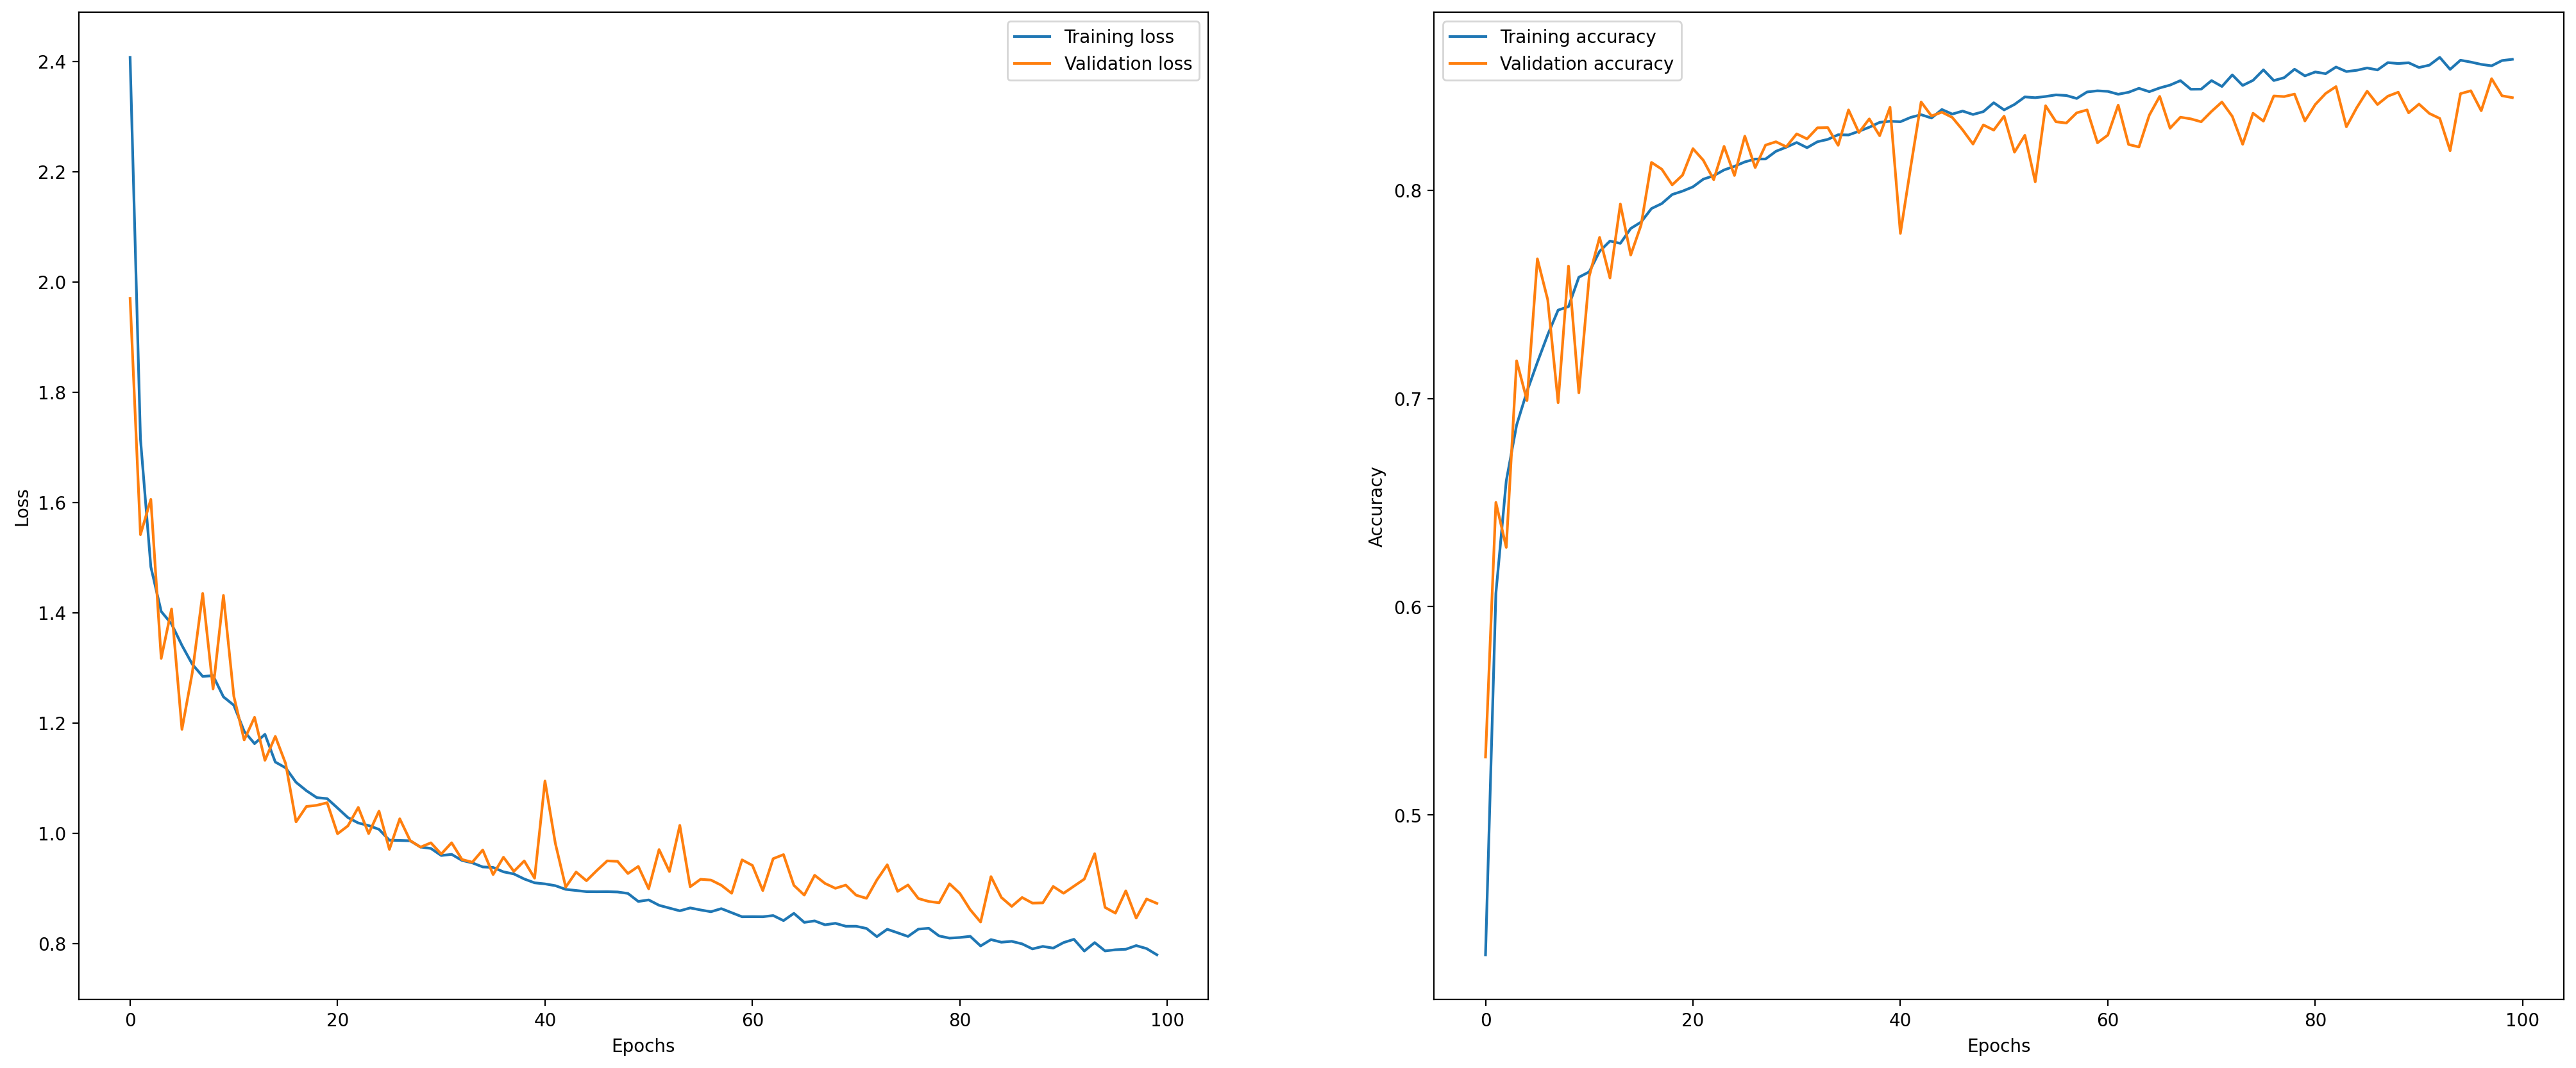

In [8]:
from keras.models import load_model
from keras.datasets import cifar10


model = load_model('/content/Modelcifar10.h5')

fig,ax = plt.subplots(1,2,figsize=(25,10),dpi=200)
ax[0].plot(result.history['loss'],label = 'Training loss')
ax[0].plot(result.history['val_loss'],label = 'Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(result.history['accuracy'],label = 'Training accuracy')
ax[1].plot(result.history['val_accuracy'],label = 'Validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [18]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

xtest = xtest.astype('float32')/255

pred = model.predict(xtest)


313/313 [==============================] - 1s 2ms/step


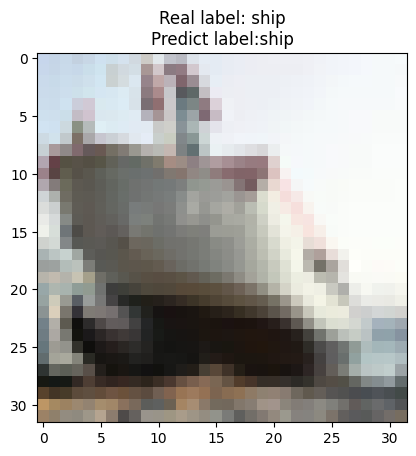

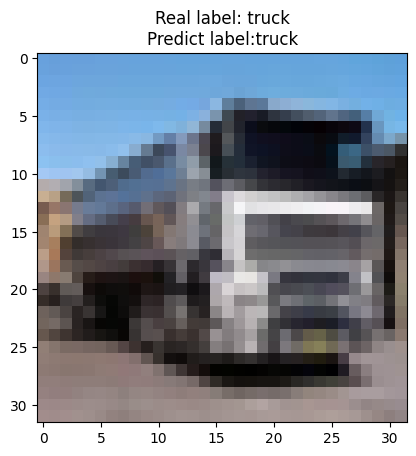

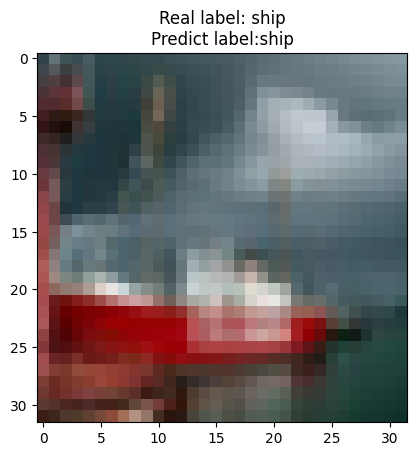

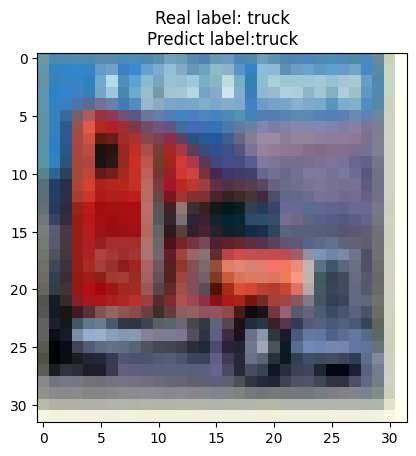

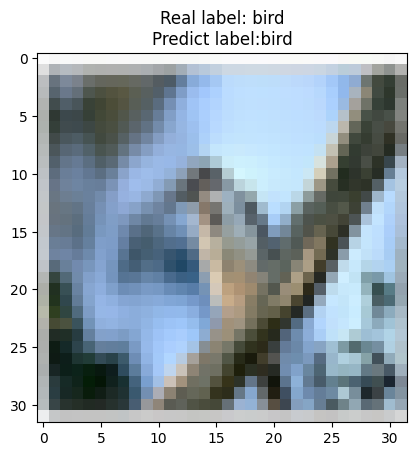

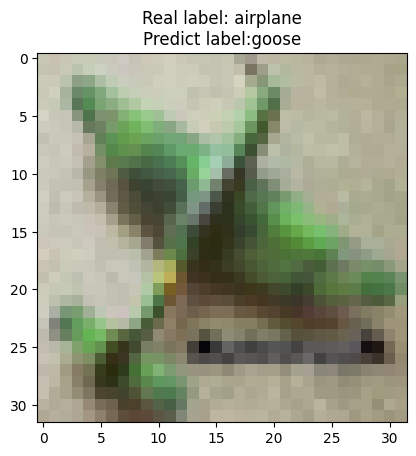

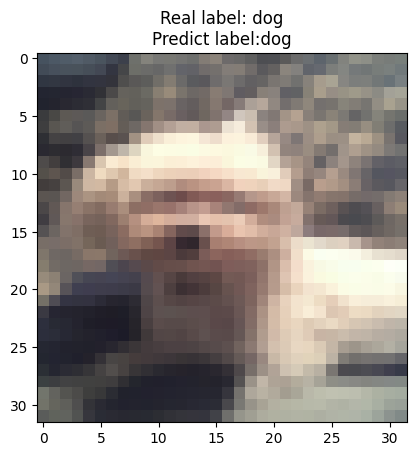

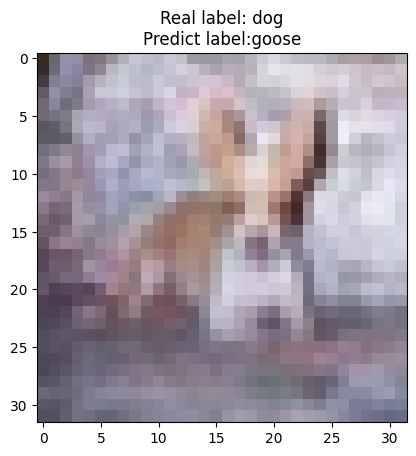

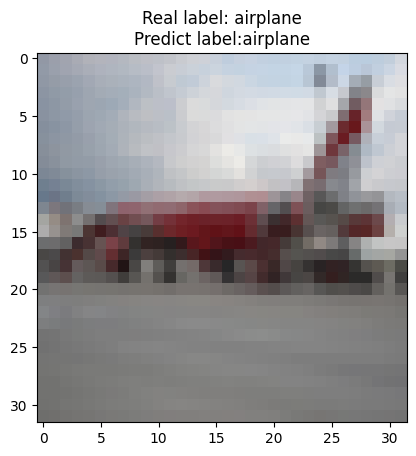

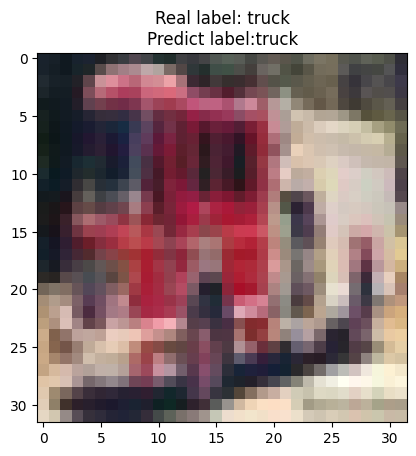

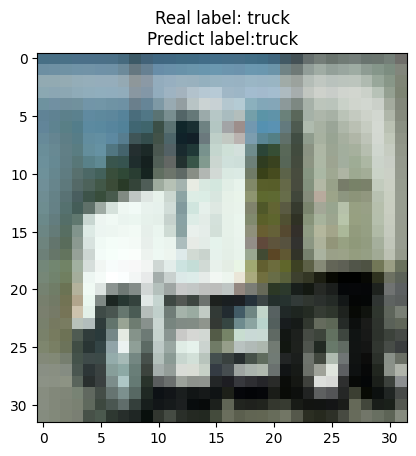

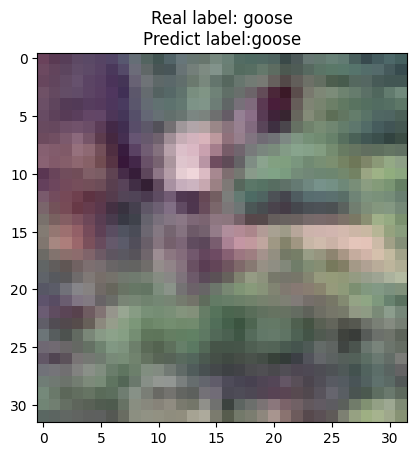

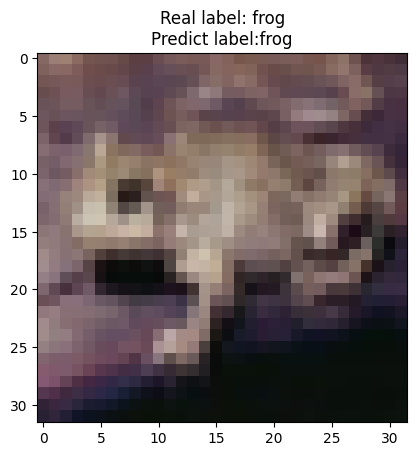

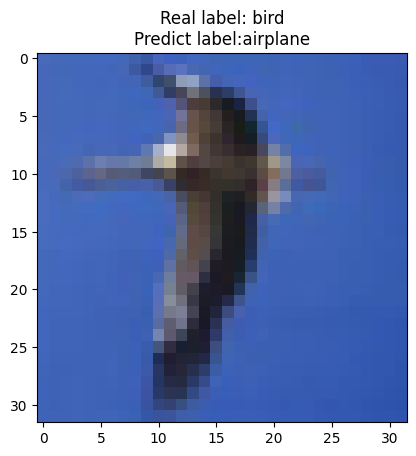

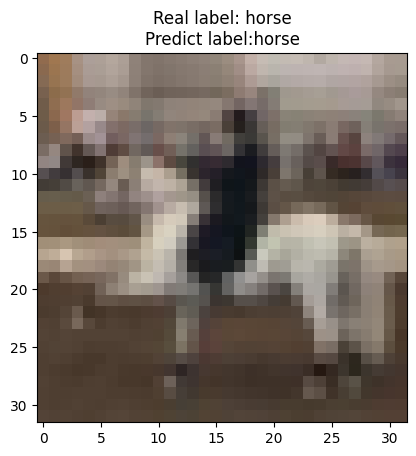

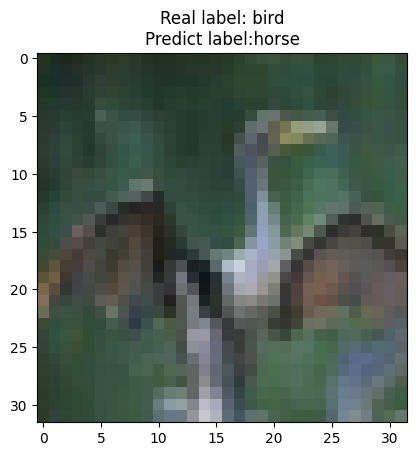

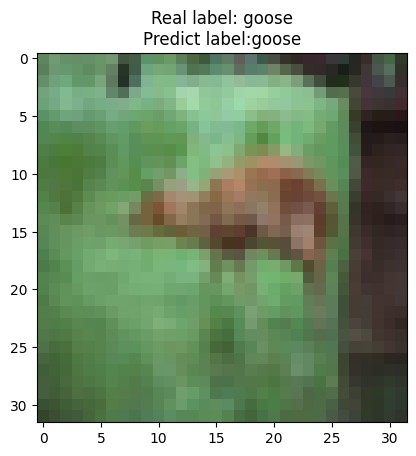

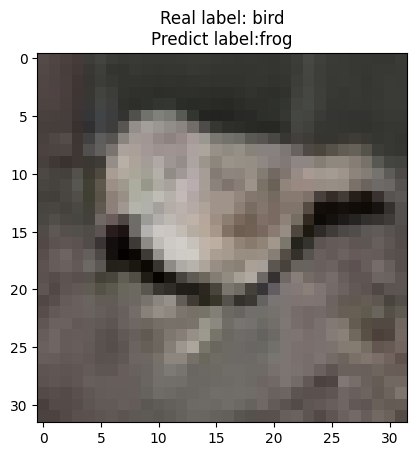

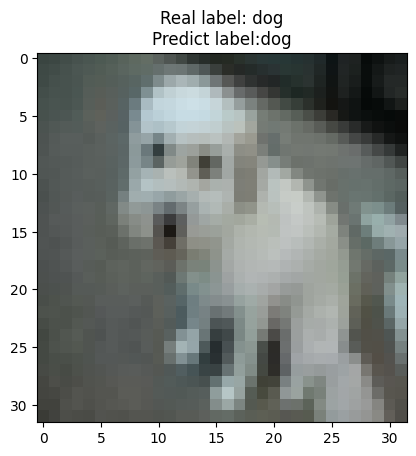

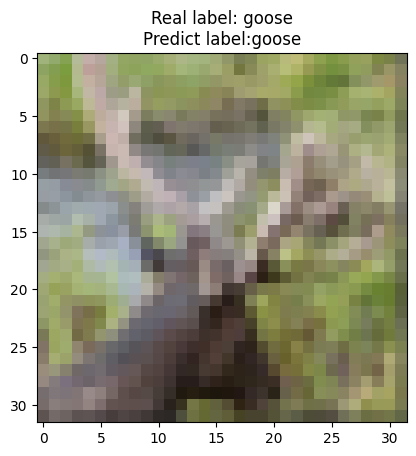

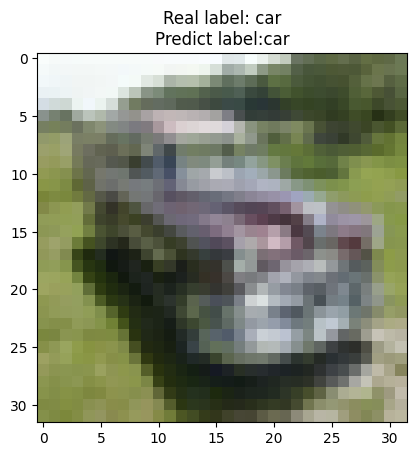

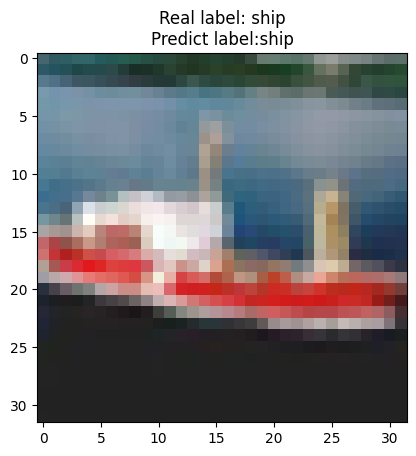

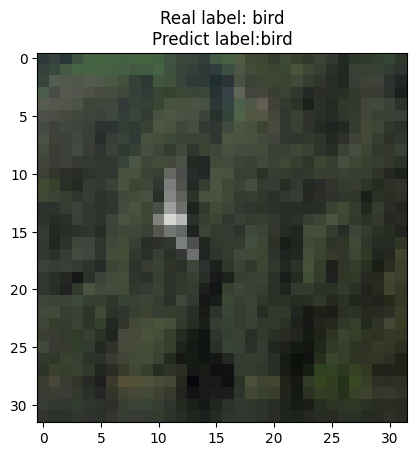

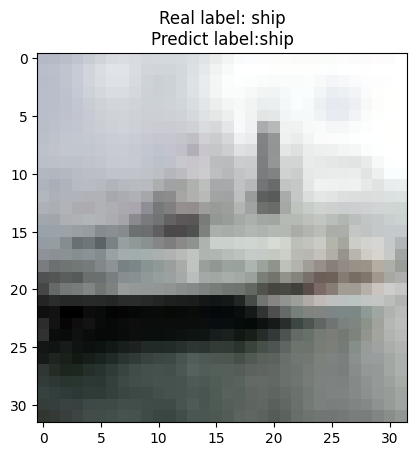

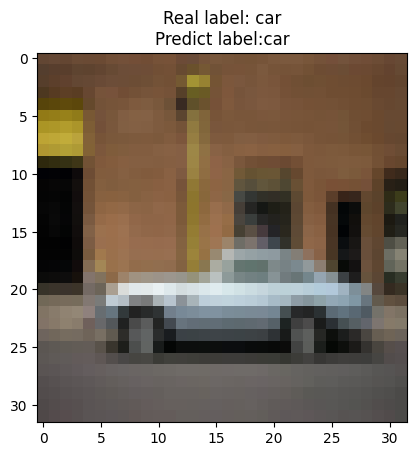

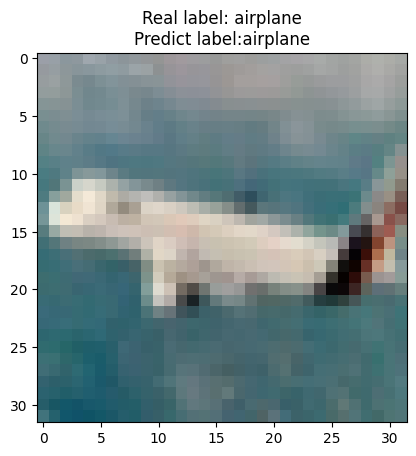

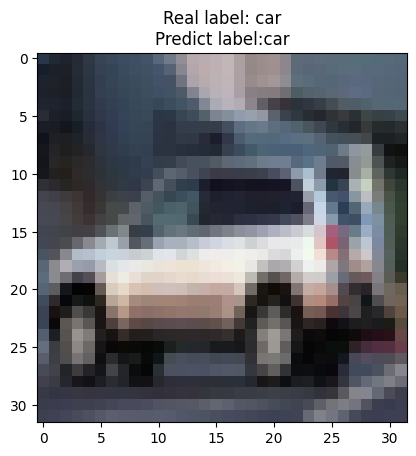

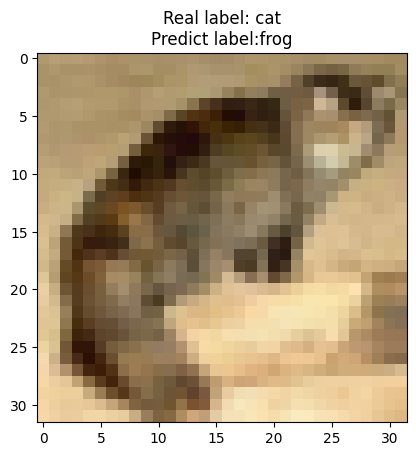

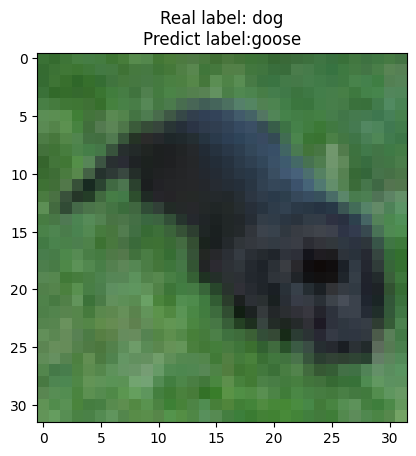

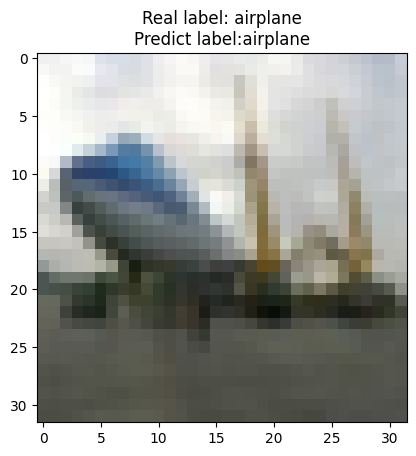

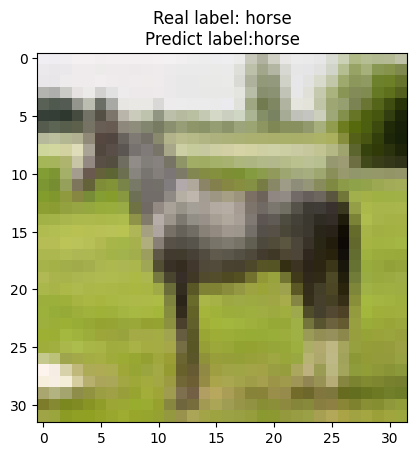

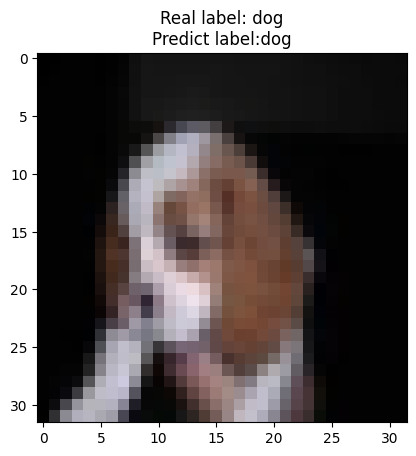

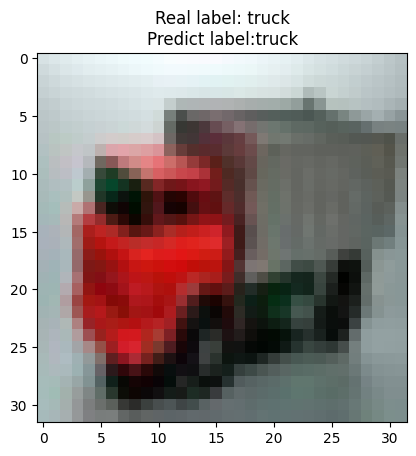

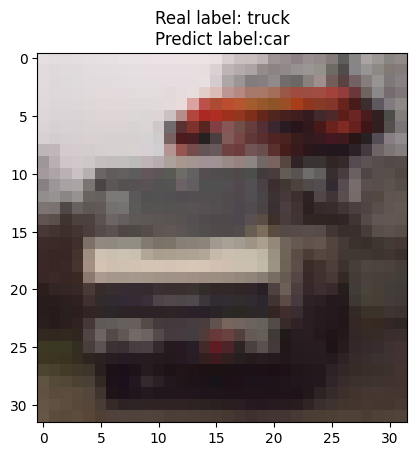

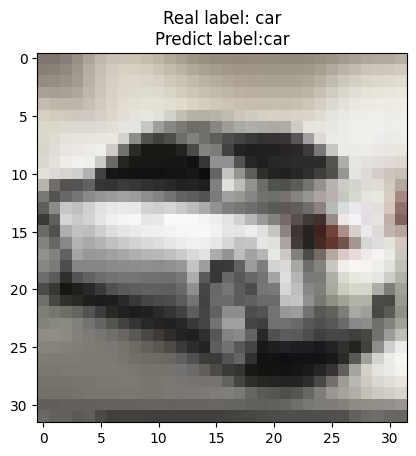

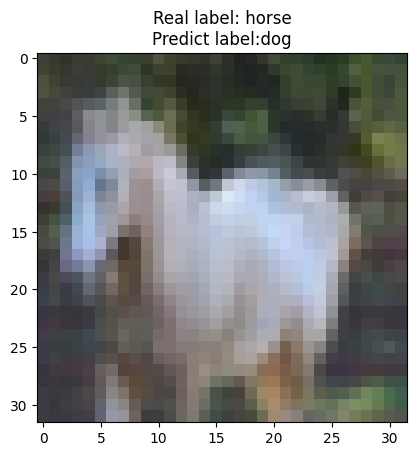

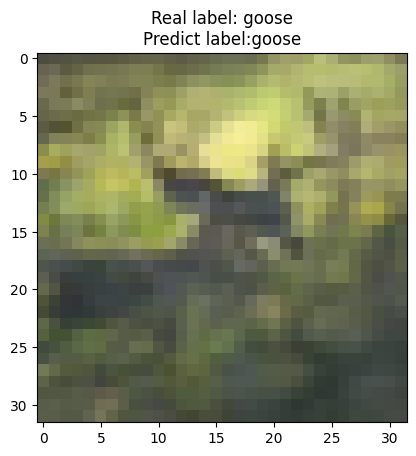

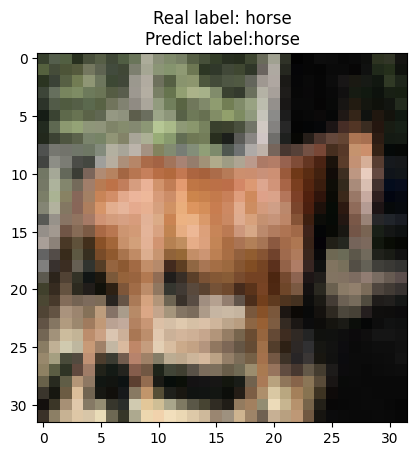

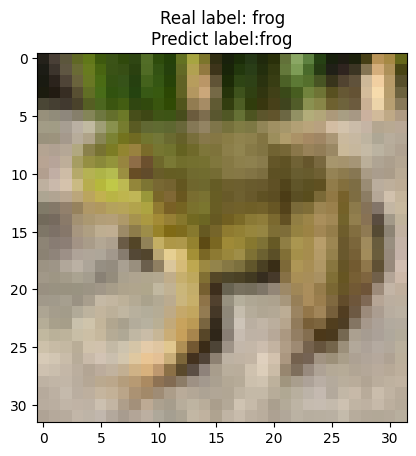

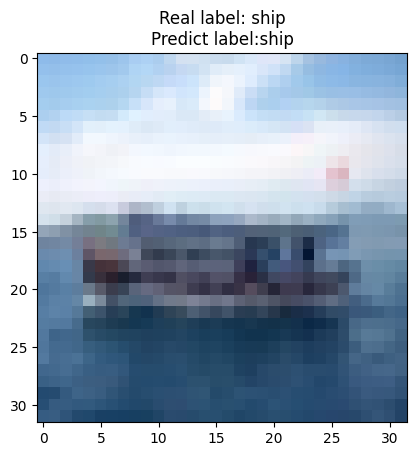

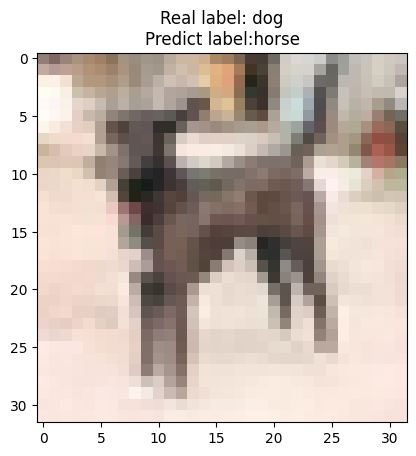

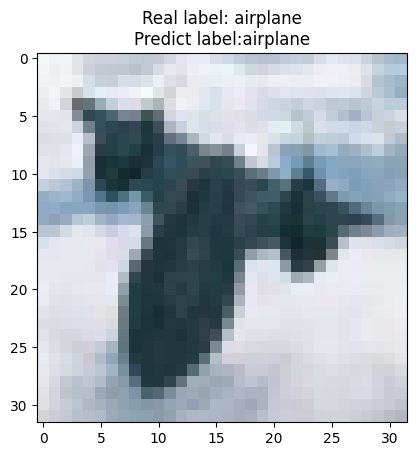

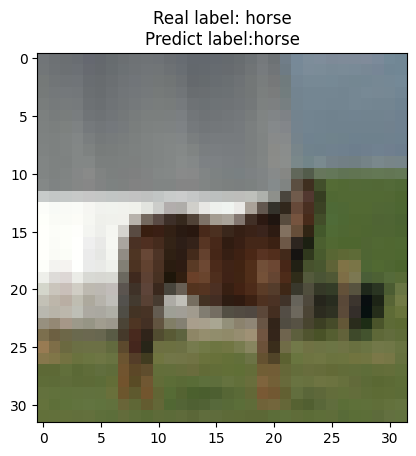

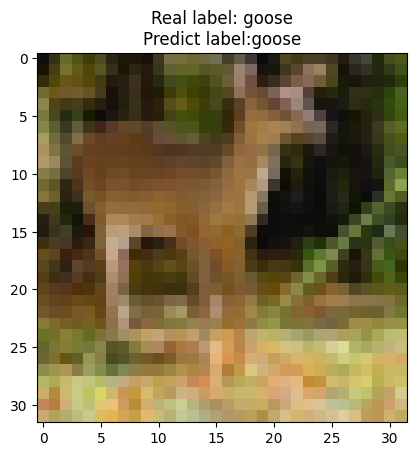

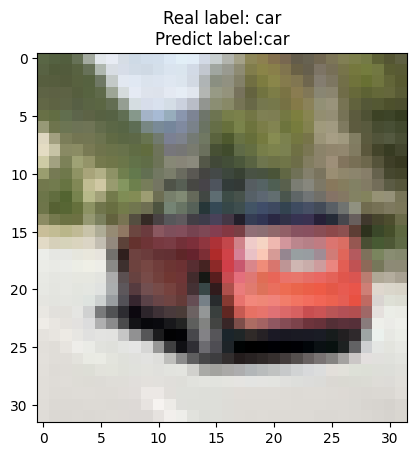

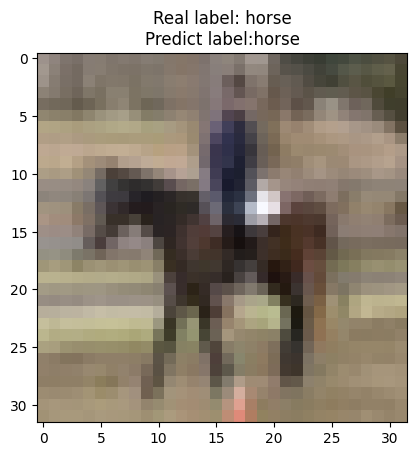

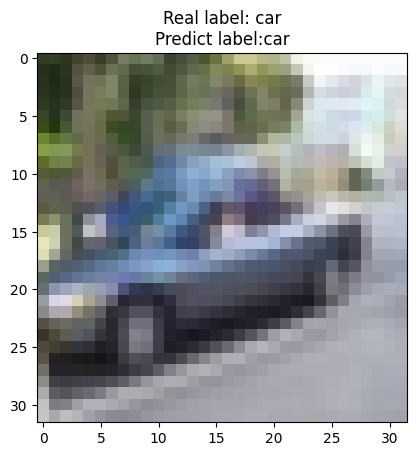

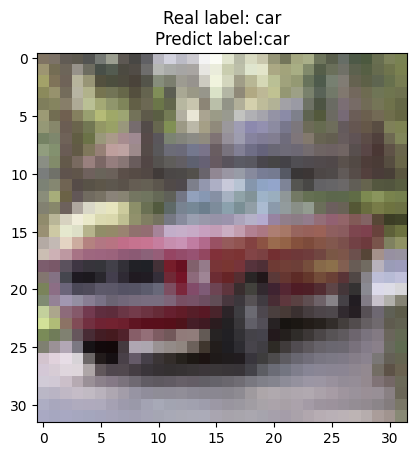

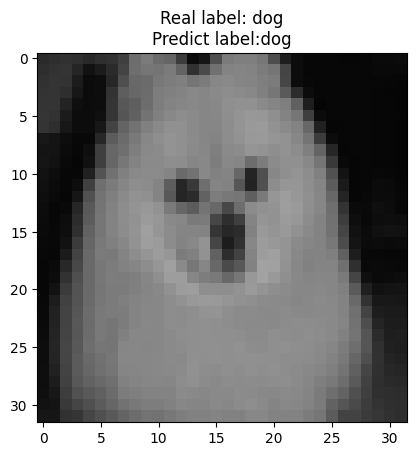

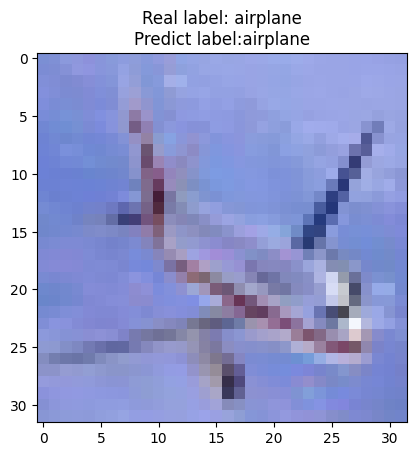

In [16]:
labels = ['airplane','car','bird','cat','goose','dog','frog','horse','ship','truck']
ytest = [labels[label[0]] for label in ytest]

for j in range(50):
  i = np.random.randint(0,xtest.shape[0],1)[0]
  plt.imshow(xtest[i])
  plt.title(f'Real label: {ytest[i]}\nPredict label:{labels[pred[i].argmax()]}')
  plt.show()